In [34]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 19.1 MB/s eta 0:00:00


In [47]:
import pandas as pd
import numpy as np
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

In [56]:
# Load the data from the Excel file
data = pd.read_excel('WPU083.xls')

# Rename the columns to 'date' for the date and 'value' for the variable to be forecasted
data = data.rename(columns={'observation_date': 'date', 'WPU083': 'value'})

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Remove duplicate values
data = data.drop_duplicates(subset='date', keep='first')

# Set the date column as the index
data = data.set_index('date')

# Specify the frequency of the data (assuming it's monthly)
data_freq = 'M'  # Adjust as needed based on the frequency of your data

# Manually split the data into training and testing sets
train_size = int(len(data) * 0.8)  # Use 80% for training
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [62]:
# Create an Exponential Smoothing model with specified frequency
model = ExponentialSmoothing(sp=data_freq)

# Fit the model to the training data
model.fit(train['value'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ExponentialSmoothing(sp='M')

In [61]:
# Forecast the variable for the next six months
forecast = model_fit.forecast(steps=len(test))

# Calculate the mean squared error (MSE) of the forecast
mse = np.mean((test['value'] - forecast)**2)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): nan


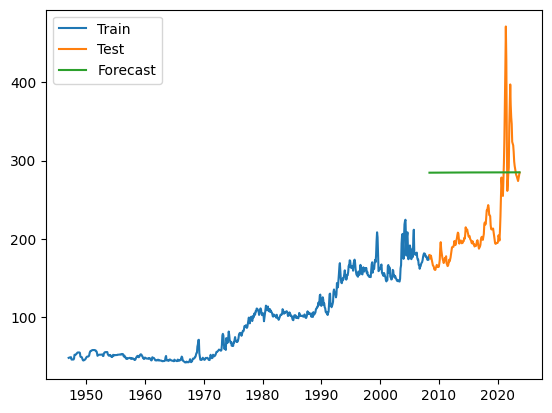

In [64]:
# Plot the historical and forecast data
plt.plot(train['value'], label='Train')
plt.plot(test.index, test['value'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()